In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import chi2,mutual_info_classif
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [3]:
data=pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
 1   Pclass    891 non-null    int64
 2   Sex       891 non-null    int64
 3   Age       891 non-null    int64
 4   SibSp     891 non-null    int64
 5   Parch     891 non-null    int64
 6   Fare      891 non-null    int64
 7   Embarked  891 non-null    int64
dtypes: int64(8)
memory usage: 55.8 KB


"AGE","CABIN" AND "EMBARKED" HAVE MISSING VALUES

In [8]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
data.duplicated().unique()

array([False])

In [10]:
data["Pclass"].unique()

array([3, 1, 2])

# DATA PREPROCESSING

#### ENCODING "Sex" AND "Embarked" COLUMN

In [25]:
data["Sex"]=data["Sex"].map({"male":1,"female":0})
data["Embarked"]=data["Embarked"].map({"S":0,"C":1,"Q":2})


In [26]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0.0


In [32]:



data["Embarked"].fillna(data["Embarked"].mode()[0], inplace=True)

In [33]:

data["Embarked"].isnull().sum()

0

# FEATURE ENGINEERING

#### DROPPING 'Cabin' AS IT HAS TWO MANY NULL VALUES

In [36]:
data.drop('Cabin',axis=1,inplace=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,108,1,22,1,0,523,7,0
1,2,1,1,190,0,38,1,0,596,71,1
2,3,1,3,353,0,26,0,0,669,7,0
3,4,1,1,272,0,35,1,0,49,53,0
4,5,0,3,15,1,35,0,0,472,8,0


#### DROPPING "PassengerId", "Name" AND "Ticket" AS THEY ARE JUST UNIQUE IDENTIFIERS

In [38]:
data.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)

In [39]:
features=data.drop("Survived",axis=1)
target=data["Survived"]

In [40]:
features.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22,1,0,7,0
1,1,0,38,1,0,71,1
2,3,0,26,0,0,7,0
3,1,0,35,1,0,53,0
4,3,1,35,0,0,8,0


In [41]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

#### CHI SQUARE TEST

In [42]:
chi_test=chi2(features,target)


###### F-VALUE

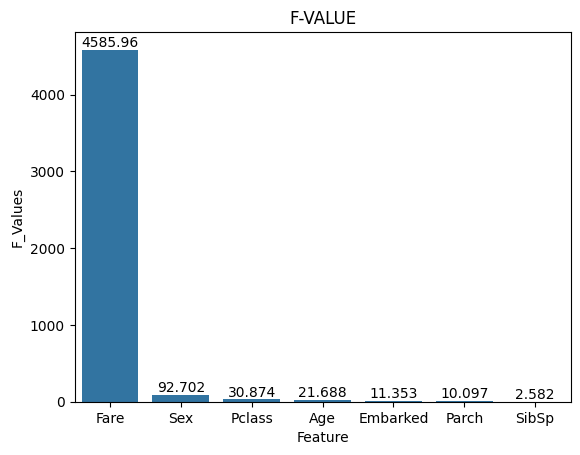

In [43]:
value1=chi_test[0]
f_value=pd.Series(value1)
f_value.index=features.columns
df1=pd.DataFrame({"Feature":f_value.index,"F_Values":f_value})
df1.sort_values(ascending=False,by="F_Values",inplace=True)
df1["F_Values"]=df1["F_Values"].round(3)
bar10=sns.barplot(x="Feature",y="F_Values",data=df1)
bar10.bar_label(bar10.containers[0])
plt.title("F-VALUE")
plt.show()

###### P-VALUE

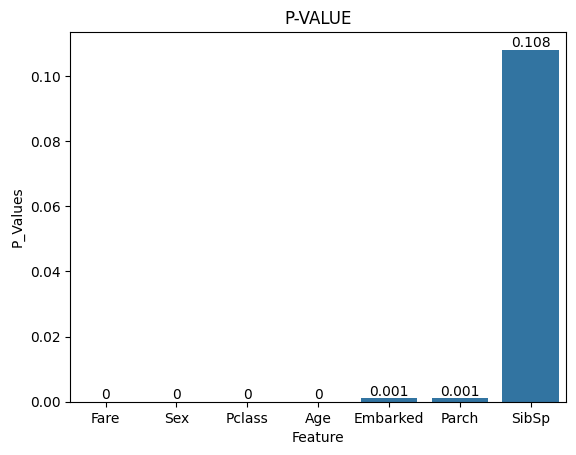

In [44]:
value2=chi_test[1]
p_value=pd.Series(value2)
p_value.index=features.columns
df2=pd.DataFrame({"Feature":p_value.index,"P_Values":p_value})
df2.sort_values(ascending=True,by="P_Values",inplace=True)
df2["P_Values"]=df2["P_Values"].round(3)
bar11=sns.barplot(x="Feature",y="P_Values",data=df2)
bar11.bar_label(bar11.containers[0])
plt.title("P-VALUE")
plt.show()

#### MUTUAL INFORMATION GAIN

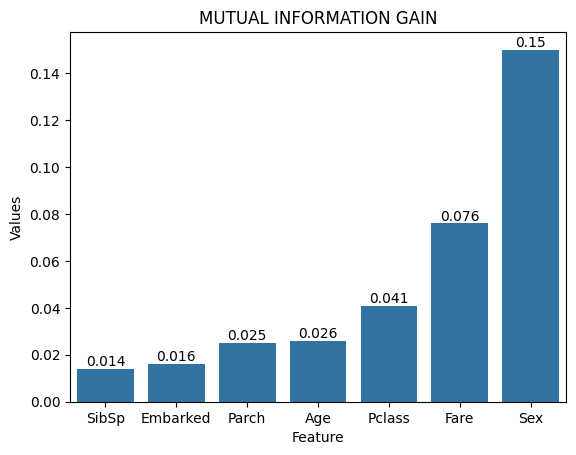

In [45]:
value3=mutual_info_classif(features,target)
mutual_info=pd.Series(value3)
mutual_info.index=features.columns
df3=pd.DataFrame({"Feature":mutual_info.index,"Values":mutual_info})
df3.sort_values(ascending=True,by="Values",inplace=True)
df3["Values"]=df3["Values"].round(3)
bar12=sns.barplot(x="Feature",y="Values",data=df3)
bar12.bar_label(bar12.containers[0])
plt.title("MUTUAL INFORMATION GAIN")
plt.show()

'CHI SQUARE TEST' AND 'MUTUAL INFORMATION' CLEARLY DEPICT THE MOST IMPORTANT COLUMNS i.e. 'Sex','Fare','Pclass','Age','Embarked'.

In [46]:
features.drop(["SibSp","Parch"],axis=1,inplace=True)

In [47]:
features.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,1,22,7,0
1,1,0,38,71,1
2,3,0,26,7,0
3,1,0,35,53,0
4,3,1,35,8,0


# SPLITTING THE DATA INTO TRAINING AND TESTING DATA

In [48]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.3,random_state=24)

In [49]:
x_train.shape

(623, 5)

In [50]:
x_test.shape

(268, 5)

# MODEL TRAINING

### RANDOM FOREST CLASSIFIER

In [54]:
parameters={"criterion":['gini','entropy'],

            "max_depth":[2,6,10,14,18],
            "min_samples_split":[3,7,11,15,19],
            "max_features":["sqrt","log2"],
            "n_estimators":[100,200,300,400]}
model2=RandomForestClassifier()
tuning=GridSearchCV(model2,param_grid=parameters,cv=5,scoring='accuracy')
tuning.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 6, 10, 14, 18],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [3, 7, 11, 15, 19],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='accuracy')

In [55]:
tuning.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_split': 3,
 'n_estimators': 300}

In [56]:
train_pred2=tuning.predict(x_train)
test_pred2=tuning.predict(x_test)

# PERFORMANCE EVALUATION

#### ACCURACY

In [57]:
train_accuracy2=accuracy_score(train_pred2,y_train)
print("Training Accuracy- ",train_accuracy2.round(2))

Training Accuracy-  0.94


In [58]:
test_accuracy2=accuracy_score(test_pred2,y_test)
print("Test Accuracy- ",test_accuracy2.round(2))

Test Accuracy-  0.84


#### CLASSIFICATION REPORT

In [60]:
report=classification_report(test_pred2,y_test)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       181
           1       0.74      0.80      0.77        87

    accuracy                           0.84       268
   macro avg       0.82      0.83      0.83       268
weighted avg       0.85      0.84      0.84       268



#### CONFIDENCE MATRIX

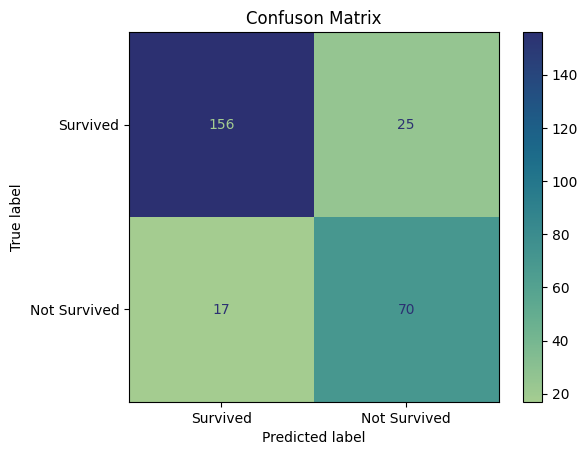

In [61]:
matrix2=confusion_matrix(test_pred2,y_test)
cm2=ConfusionMatrixDisplay(matrix2,display_labels=["Survived","Not Survived"])
cm2.plot(cmap="crest")
plt.title("Confuson Matrix")
plt.show()

# TESTING PREDICTIONS

In [62]:
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names")
pclass=3
sex=0
age=30
fare=9
embarked=0
new_data=[[pclass,sex,age,fare,embarked]]
pred=tuning.predict(new_data)
if(pred[0]==0):
    print("Not Survived")
else:
    print("Survived")

Not Survived
